# Name : Pratik Vyas

## Assignement - Linear Regression

##  Creating two model
- There are two models for feature selection
    - __Model 1 (Step 5 )__ - Manual Feature selection:
        - Include all feature 
        - Manually remove all features with p-value > 0.05 , VIF > 0.5 , low Adj.R-square ,         
    - __Model 2 (Step 6 )__ : automatic feature selection with RFE
        - Use __sklearn.feature_selection.RFE__ to select top features
        - out of top features keep only with p-value < 0.05 , VIF < 0.5 , high Adj.R-square
        
## Conclusion:
- Model 2 is better with Adj. R-squared:  0.871

# Step 1: Reading and Understanding the Data

In [1519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [1520]:
cars=pd.read_csv(r"C:\Users\ADMIN.DESKTOP-GVUNOB8\Downloads\CarPrice_Assignment.csv")

- create new feature CarCompany

In [1521]:
cars["CarCompany"]=df["CarName"].str.split(" ").str[0]
## remove two columns , not require for analysis
cars.drop(['CarName','car_ID'], axis = 1, inplace = True)

In [1522]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1523]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Check missing value

In [1524]:
cars.isnull().mean() * 100

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
CarCompany          0.0
dtype: float64

# Step 2: Visualising the Data

#### Visualising Numeric Variables
- following variable have linear relation with Price
  - wheelbase,carlength,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg

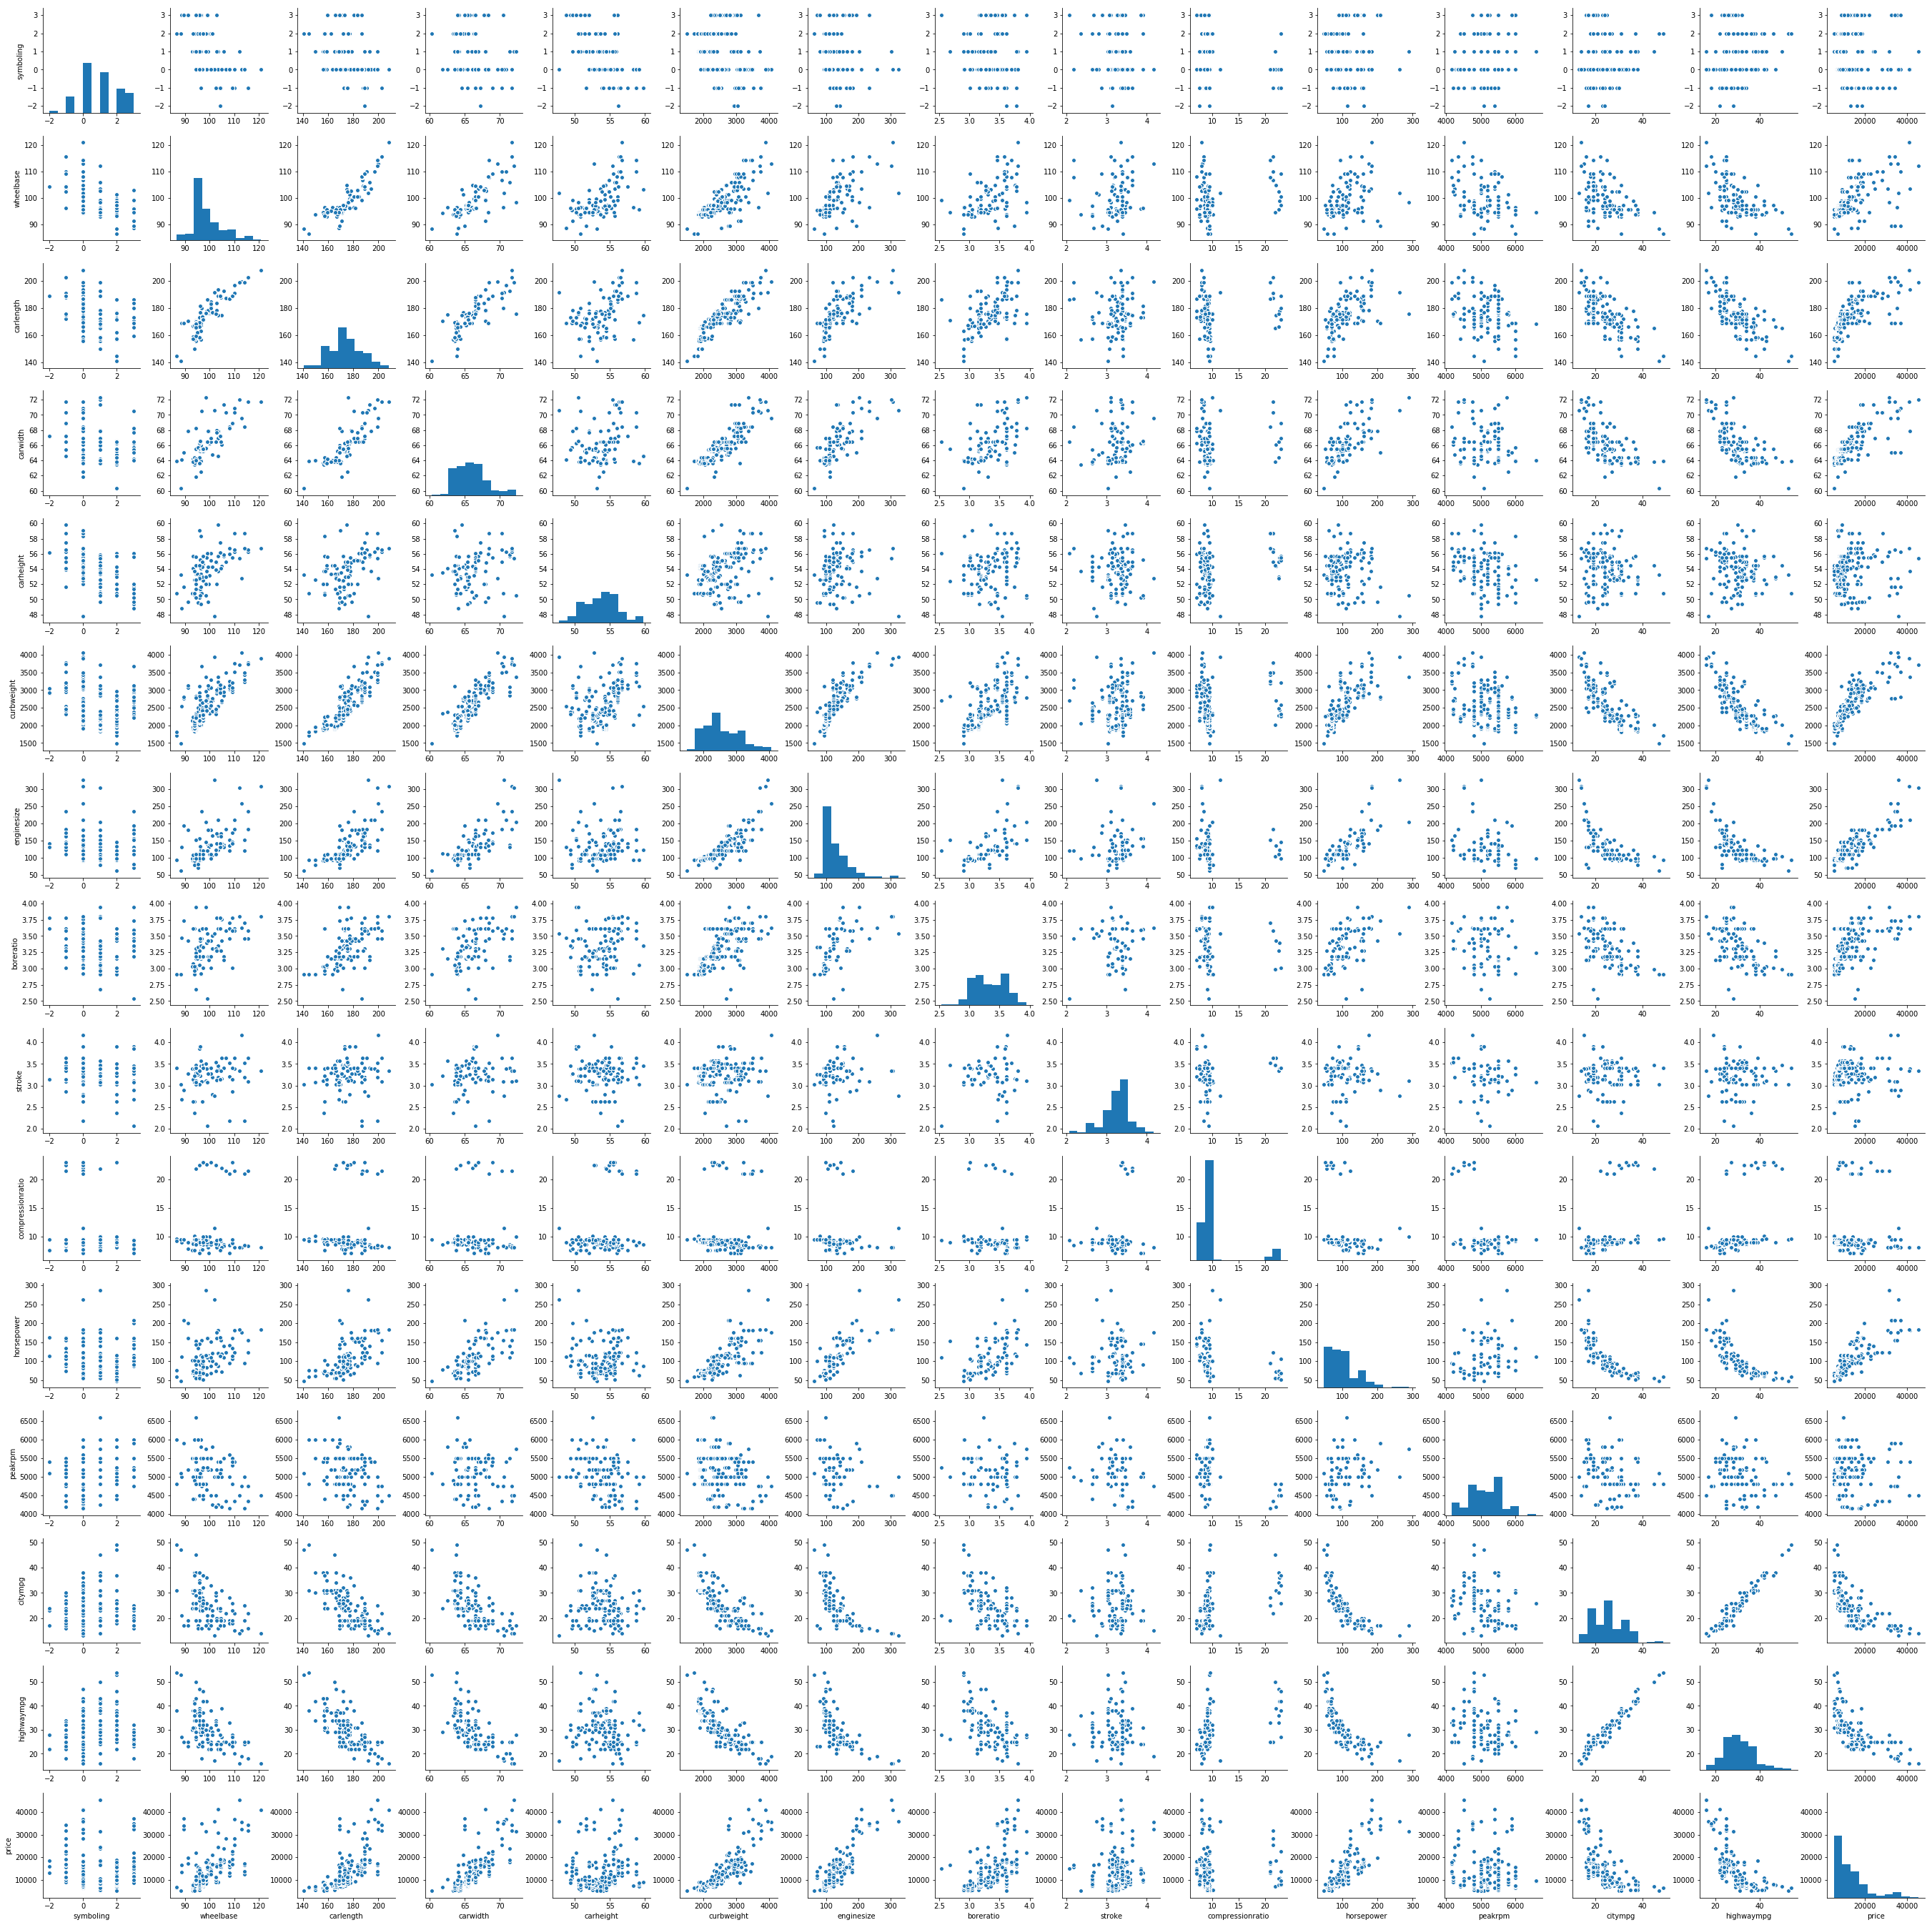

In [1525]:
sns.pairplot(cars)
plt.show()
## Following variable have linear relation with Price
# wheelbase,carlength,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg

#### Visualising Categorical Variables

In [1526]:
print("------fueltype-------")
print(cars["fueltype"].value_counts())
print("------aspiration-------")
print(cars["aspiration"].value_counts())
print("------doornumber-------")
print(cars["doornumber"].value_counts())
print("------carbody-------")
print(cars["carbody"].value_counts())
print("------enginelocation-------")
print(cars["enginelocation"].value_counts())
print("------fuelsystem-------")
print(cars["fuelsystem"].value_counts())
print("------CarCompany-------")
print(cars["CarCompany"].value_counts())


------fueltype-------
gas       185
diesel     20
Name: fueltype, dtype: int64
------aspiration-------
std      168
turbo     37
Name: aspiration, dtype: int64
------doornumber-------
four    115
two      90
Name: doornumber, dtype: int64
------carbody-------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
------enginelocation-------
front    202
rear       3
Name: enginelocation, dtype: int64
------fuelsystem-------
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
------CarCompany-------
toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw    

#### Boxplot of categorical variable

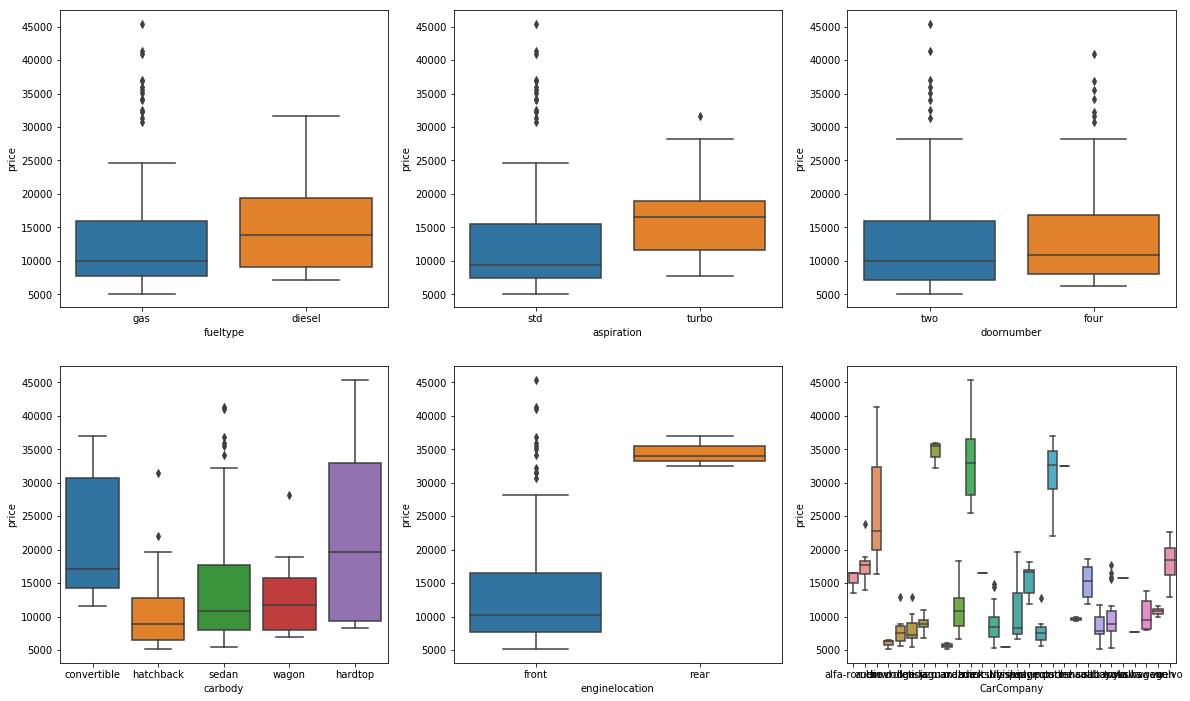

In [1527]:
## ploting Categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(2,3,6)
sns.boxplot(x = 'CarCompany', y = 'price', data = cars)
plt.show()

## Step 3: Data Preparation

#### 3.1  Label Encoding

In [1528]:
## apply label encoding on text categorical variable.

from sklearn import preprocessing

categorical_text_var=["carbody","enginelocation","aspiration","fueltype","CarCompany","doornumber","drivewheel","fuelsystem", "enginetype"
,"cylindernumber"]

lab = preprocessing.LabelEncoder() 
cars[categorical_text_var]=cars[categorical_text_var].apply(lambda col: lab.fit_transform(col))
cars[categorical_text_var].head()

,carbody,enginelocation,aspiration,fueltype,CarCompany,doornumber,drivewheel,fuelsystem,enginetype,cylindernumber
0,0,0,0,1,1,1,2,5,0,2
1,0,0,0,1,1,1,2,5,0,2
2,2,0,0,1,1,1,2,5,5,3
3,3,0,0,1,2,0,1,5,3,2
4,3,0,0,1,2,0,0,5,3,1


In [1529]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


## Step 4: Splitting the Data into Training and Testing Sets

#### 4.1  Split train and test

In [1530]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1531]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
122,1,1,0,0,3,1,0,93.7,167.3,63.8,...,1,2.97,3.23,9.4,68,5500,31,38,7609.0,16
125,3,1,0,1,2,2,0,94.5,168.9,68.3,...,5,3.94,3.11,9.5,143,5500,19,27,22018.0,18
166,1,1,0,1,2,2,0,94.5,168.7,64.0,...,5,3.24,3.08,9.4,112,6600,26,29,9538.0,22
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
199,-1,1,1,0,4,2,0,104.3,188.8,67.2,...,5,3.62,3.15,7.5,162,5100,17,22,18950.0,26


#### 4.2 Scaling Features
- StandardScaler/ MinMaxScaler

In [1532]:
# StandardScaler
scaler = preprocessing.StandardScaler()
# MinMaxScaler
#scaler = preprocessing.MinMaxScaler()

cols=df_train.columns
df_train[cols]=scaler.fit_transform(df_train[cols])


df_train.head()

G:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
G:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
122,0.170159,0.316228,-0.471405,-0.887412,0.401621,-0.519748,-0.083918,-0.811836,-0.487238,-0.924500,...,-1.053036,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,-0.700201,0.271682
125,1.848278,0.316228,-0.471405,1.126872,-0.794875,1.249870,-0.083918,-0.677177,-0.359789,1.114978,...,0.934873,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,1.151929,0.540544
166,0.170159,0.316228,-0.471405,1.126872,-0.794875,1.249870,-0.083918,-0.677177,-0.375720,-0.833856,...,0.934873,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.452248,1.078268
1,1.848278,0.316228,-0.471405,1.126872,-3.187866,1.249870,-0.083918,-1.670284,-0.367754,-0.788535,...,0.934873,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0.442646,-1.744782
199,-1.507960,0.316228,2.121320,-0.887412,1.598117,1.249870,-0.083918,0.972390,1.225364,0.616439,...,0.934873,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,0.757569,1.615991


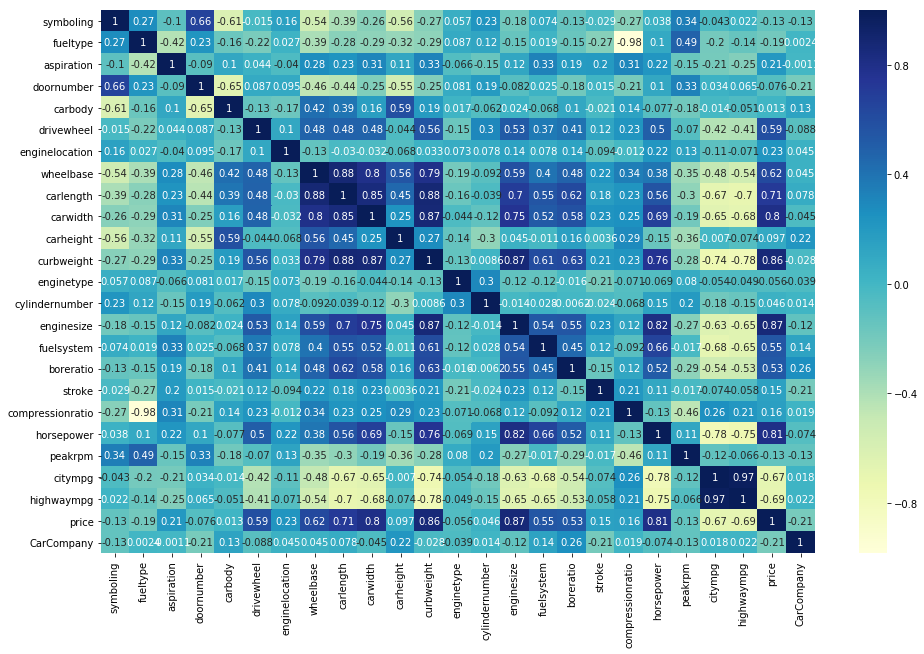

In [1533]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### 4.3 Divide X_train and y_train

In [1534]:
y_train = df_train['price']
X_train = df_train.loc[:, df_train.columns != 'price'] #df_train[~df_train.isin(["price"])]

#### Include all feature which have linear relation with price

In [1535]:
X_numeric_features=["wheelbase","carlength","curbweight","carwidth","enginesize","boreratio","horsepower","highwaympg","citympg"]
X_cat_features_dummyencode=["carbody","enginelocation","aspiration","fueltype","CarCompany"]
features= X_numeric_features + X_cat_features_dummyencode


##  Model Building
- There are two models for feature selection
    - __Model 1__ - Manual Feature selection:
        - Include all feature 
        - Manually remove all features with p-value > 0.05 , VIF > 0.5 , low Adj.R-square ,         
    - __Model 2__ : automatic feature selection with RFE
        - Use __sklearn.feature_selection.RFE__ to select top features
        - out of top features keep only with p-value < 0.05 , VIF < 0.5 , high Adj.R-square

## Step 5
##  Model 1 : Include all features manually
- __Model 1__ - Manual Feature selection:
        - Include all feature 
        - Manually remove all features with p-value > 0.05 , VIF > 0.5 , low Adj.R-square ,

In [1536]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[features])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     63.17
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.95e-50
Time:                        16:32:45   Log-Likelihood:                -55.042
No. Observations:                 143   AIC:                             140.1
Df Residuals:                     128   BIC:                             184.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.031   4.58e

In [1537]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,118.47
18,compressionratio,106.27
21,citympg,34.35
22,highwaympg,31.16
11,curbweight,21.04
19,horsepower,14.93
8,carlength,13.72
14,enginesize,13.54
9,carwidth,12.04
7,wheelbase,11.59


#### 5.1 Manually remove features
#### Include selected features with p-val<0.05 , VIF < 5 ,  maximum AdjR-square

In [1538]:
selected_features=["enginesize","aspiration","CarCompany","citympg","enginelocation"]

In [1539]:
import statsmodels.api as sm


y_train = df_train['price']
X_train = df_train.loc[:, df_train.columns != 'price'] #df_train[~df_train.isin(["price"])]

X_train=X_train[selected_features]


# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_final = sm.OLS(y_train, X_train_lm).fit()
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.26e-48
Time:                        16:32:45   Log-Likelihood:                -82.361
No. Observations:                 143   AIC:                             176.7
Df Residuals:                     137   BIC:                             194.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.037   3.92e

In [1540]:
## VIF analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,citympg,1.71
0,enginesize,1.70
1,aspiration,1.05
4,enginelocation,1.03
2,CarCompany,1.02


#### 5.2  Residual Analysis of the train data

In [1541]:
print(y_train.head())
print(y_train_predicted.head())

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
Name: price, dtype: float64
122   -0.718217
125    0.519010
166   -0.669879
1      0.393195
199    0.311789
dtype: float64


G:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


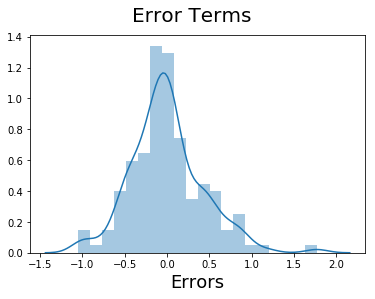

In [1542]:
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### 5.3 Error plot  :  Feature vs error ( y - y_pred)
- There is no erlation between Errors and feature ( Errors are linearly independent )

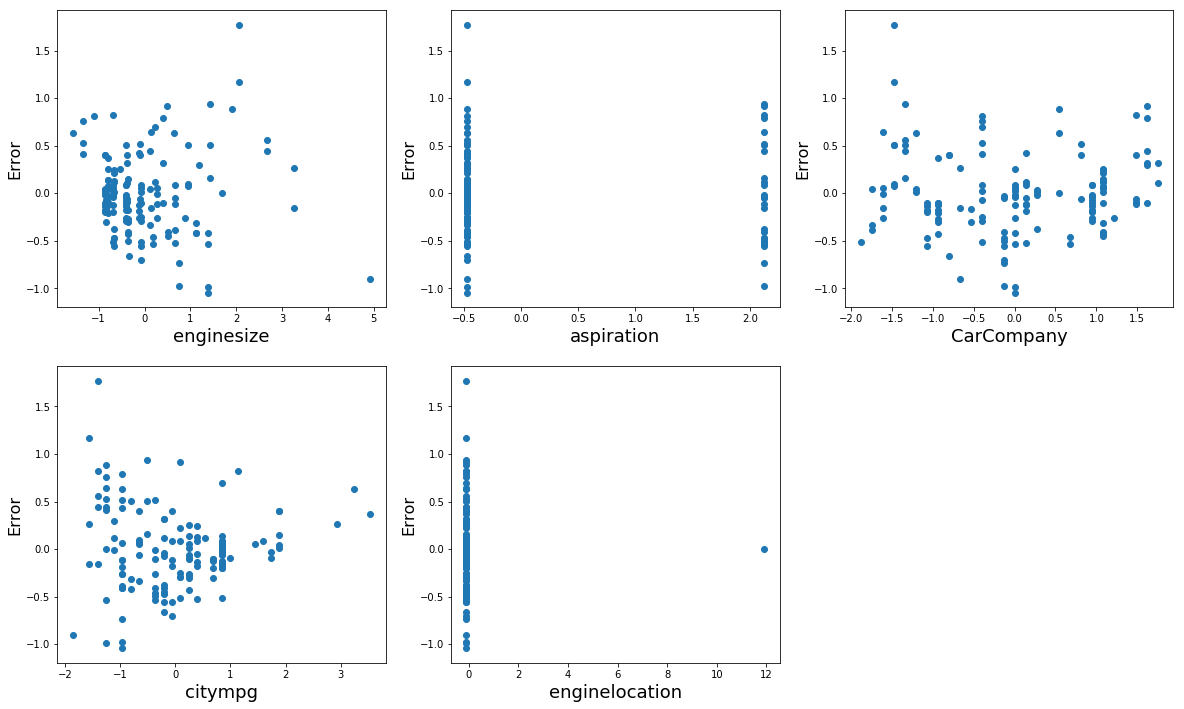

In [1543]:
cnt=0
plt.figure(figsize=(20, 12))
for x in selected_features:
    plt.subplot(2,3,cnt+1)
    plt.scatter(X_train[x] ,(y_train - y_train_predicted))
    plt.xlabel(x, fontsize = 18)                         
    plt.ylabel('Error', fontsize = 16)
    cnt+=1
plt.show()
    

#### 5.4  Making Predictions Using the Final Model

#### Scale test dataset

In [1544]:
cols=df_test.columns
df_test[cols]=scaler.transform(df_test[cols])

df_test.head()

G:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
160,-0.668901,0.316228,-0.471405,-0.887412,0.401621,-0.519748,-0.083918,-0.475189,-0.566894,-0.652569,...,-1.053036,-0.451443,-0.706633,-0.278345,-0.822372,-0.688236,1.887918,2.320526,-0.683619,1.078268
186,1.009219,0.316228,-0.471405,-0.887412,0.401621,-0.519748,-0.083918,-0.205872,-0.136752,-0.154030,...,0.934873,-0.451443,0.481417,-0.278345,-0.443427,0.250069,0.240833,0.449816,-0.586315,1.481560
59,0.170159,0.316228,-0.471405,1.126872,-0.794875,-0.519748,-0.083918,0.046613,0.349149,0.299187,...,-1.053036,0.317543,0.449308,-0.384120,-0.468690,-0.688236,0.091098,0.162014,-0.541326,-0.400473
165,0.170159,0.316228,-0.471405,1.126872,0.401621,1.249870,-0.083918,-0.677177,-0.375720,-0.833856,...,0.934873,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,-0.483097,1.078268
140,1.009219,0.316228,-0.471405,1.126872,-0.794875,-2.289366,-0.083918,-0.879165,-1.283797,-0.924500,...,-1.053036,1.201877,-1.958901,-0.357676,-0.746583,-1.522285,0.091098,0.018113,-0.700972,0.943837


In [1545]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.102493,-0.076507,-0.011405,-0.010224,-0.196627,0.193808,0.303188,0.129960,0.166583,0.101818,...,0.221471,0.284055,0.056744,0.078647,0.130694,-0.034113,-0.085203,-0.058479,0.093657,0.217476
std,1.139963,1.109845,0.998567,1.006876,1.077826,0.931980,2.137577,1.039056,0.930519,0.899764,...,0.984216,1.106915,1.021918,1.157987,0.990569,0.981314,0.927210,0.968201,1.084446,1.004946
min,-2.347020,-3.162278,-0.471405,-0.887412,-3.187866,-2.289366,-0.083918,-2.006930,-2.295427,-1.513682,...,-1.550013,-2.950650,-3.789140,-0.807222,-1.277105,-2.043565,-1.705723,-2.140398,-0.984274,-1.610351
25%,-0.668901,0.316228,-0.471405,-0.887412,-0.794875,-0.519748,-0.083918,-0.475189,-0.323943,-0.561926,...,-1.053036,-0.451443,-0.321319,-0.410564,-0.727636,-0.688236,-0.957048,-0.845291,-0.590749,-0.400473
50%,0.170159,0.316228,-0.471405,-0.887412,0.401621,-0.519748,-0.083918,-0.113294,0.110181,-0.108709,...,0.934873,0.317543,0.320870,-0.278345,-0.051851,-0.271212,-0.208373,-0.125787,-0.280647,0.204467
75%,1.009219,0.316228,-0.471405,1.126872,0.401621,1.249870,-0.083918,0.778818,0.952543,0.299187,...,0.934873,1.201877,0.674074,-0.172569,0.415514,0.719221,0.540303,0.449816,0.455661,1.078268
max,1.848278,0.316228,2.121320,1.126872,1.598117,1.249870,11.916375,3.766554,2.762723,2.791881,...,1.928828,1.893965,2.086890,3.423794,2.638656,3.064983,1.887918,2.320526,4.157447,1.615991


#### 5.5  Divide X_test and y_test


In [1546]:
y_test = df_test['price']
X_test = df_test.loc[:, df_test.columns != 'price'] #df_test[~df_test.isin(["price"])]

In [1566]:
## predict on selected features

X_test_final=sm.add_constant(X_test[selected_features])
y_test_pred=lr_final.predict(X_test_final)

In [1567]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

-2.609587971312747

#### 5.6 Model Evaluation

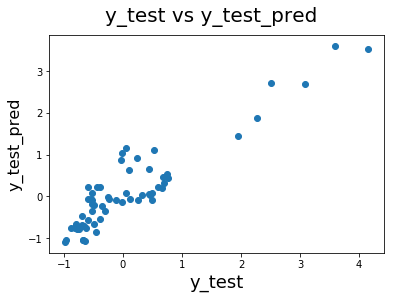

In [1548]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

## Step 6 : 
## Model 2 : sikit-learn - RFE method for feature selection
- __Model 2__ : automatic feature selection with RFE
        - Use __sklearn.feature_selection.RFE__ to select top features
        - out of top features keep only with p-value < 0.05 , VIF < 0.5 , high Adj.R-square

In [1549]:
## Load data
cars=pd.read_csv(r"C:\Users\ADMIN.DESKTOP-GVUNOB8\Downloads\CarPrice_Assignment.csv")

## derive carcopany 
cars["CarCompany"]=df["CarName"].str.split(" ").str[0]

## remove two columns , not require for analysis
cars.drop(['CarName','car_ID'], axis = 1, inplace = True)

In [1550]:
## split y_train and X_train
y = cars['price']
X = cars.loc[:, cars.columns != 'price'] 

#### 6.1 Feature encoding ( Label encoding )

In [1551]:
## Label encoding

from sklearn import preprocessing

#categorical_text_var_lblencode=["cylindernumber"]
categorical_text_var_lblencode=["carbody","enginelocation","aspiration","fueltype","CarCompany","doornumber","drivewheel","fuelsystem", 
                                "enginetype","cylindernumber"]

lab = preprocessing.LabelEncoder() 
X[categorical_text_var_lblencode]=X[categorical_text_var_lblencode].apply(lambda col: lab.fit_transform(col))
X[categorical_text_var_lblencode].head()

G:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,carbody,enginelocation,aspiration,fueltype,CarCompany,doornumber,drivewheel,fuelsystem,enginetype,cylindernumber
0,0,0,0,1,1,1,2,5,0,2
1,0,0,0,1,1,1,2,5,0,2
2,2,0,0,1,1,1,2,5,5,3
3,3,0,0,1,2,0,1,5,3,2
4,3,0,0,1,2,0,0,5,3,1


#### 6.2 split train and test dataset

In [1552]:
## split in test and train
# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0)

#### 6.3  scaling data on train/test dataset

In [1553]:
##scaling
# StandardScaler
scaler = preprocessing.StandardScaler()
# MinMaxScaler
#scaler = preprocessing.MinMaxScaler()

## scale train data
X_train_scaled= pd.DataFrame( scaler.fit_transform(X_train) , 
                             index=X_train.index,
                             columns=X_train.columns )

## scale test data
X_test_scaled= pd.DataFrame( scaler.transform(X_test) ,
                            index=X_test.index,
                            columns=X_test.columns)

#### 6.4 RFE for feature selection

In [1554]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create linear regression
sklearn_regression = LinearRegression()

## rfe , select top 8 features
rfe = RFE(sklearn_regression, 8)

## split y_train and X_train
#y_train = df_train['price']
#X_train = df_train.loc[:, df_train.columns != 'price'] 

## fit model
rfe.fit(X_train_scaled, y_train.to_frame())

G:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=8, step=1, verbose=0)

In [1555]:
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train)))

Features sorted by their rank:
[(1, 'CarCompany'), (1, 'boreratio'), (1, 'carwidth'), (1, 'curbweight'), (1, 'drivewheel'), (1, 'enginelocation'), (1, 'enginesize'), (1, 'stroke'), (2, 'citympg'), (3, 'highwaympg'), (4, 'peakrpm'), (5, 'compressionratio'), (6, 'wheelbase'), (7, 'carbody'), (8, 'fueltype'), (9, 'carlength'), (10, 'doornumber'), (11, 'aspiration'), (12, 'horsepower'), (13, 'symboling'), (14, 'carheight'), (15, 'enginetype'), (16, 'fuelsystem'), (17, 'cylindernumber')]


In [1556]:
X_train_scaled.columns[rfe.support_]

Index(['drivewheel', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'CarCompany'],
      dtype='object')

#### 6.5 select feature with RFE support/high rank 
   - keep only featurs with p-val <0.05 , VIF < 0.5 , high Adj.R-square 

In [1557]:
rfe_selected_features=[ 'enginelocation', 'carwidth',  'enginesize','horsepower', 'CarCompany'] 

#### 6.7 run model with selected important feature

In [1558]:
import statsmodels.api as sm


#y_train = df_train['price']
#X_train = df_train.loc[:, df_train.columns != 'price'] 

X_train_scaled_selected=X_train_scaled[rfe_selected_features]


# Add a constant
X_train_lm = sm.add_constant(X_train_scaled_selected)

# Create a first fitted model
lr_rfe = sm.OLS(list(y_train), X_train_lm).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     192.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.54e-60
Time:                        16:32:55   Log-Likelihood:                -1337.5
No. Observations:                 143   AIC:                             2687.
Df Residuals:                     137   BIC:                             2705.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.33e+04    238.485     55.

In [1559]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_scaled_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled_selected.values, i) for i in range(X_train_scaled_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.56
3,horsepower,3.75
1,carwidth,2.42
0,enginelocation,1.43
4,CarCompany,1.07


#### 6.8 predict y_train

In [1560]:
#predict y_train
y_train_pred=lr_rfe.predict(X_train_lm)

#### 6.9 Residual Analysis of the train data

G:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


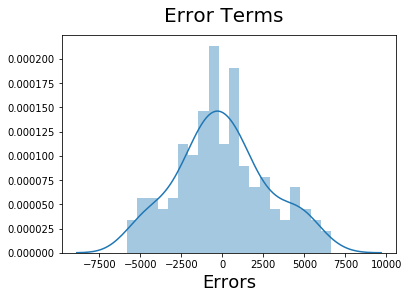

In [1561]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### 6.10  make prediction on test

In [1562]:
X_test_rfe=sm.add_constant(X_test[rfe_selected_features])
y_test_pred=lr_rfe.predict(X_test_rfe)

In [1563]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

-7582.113099747683

#### 6.11 model evaluation

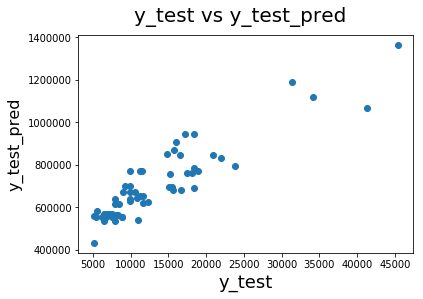

In [1564]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

### ******* END ***************